In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import project_engie_scada
from project_engie_scada import Project_Engie
from operational_analysis.methods import turbine_long_term_gross_energy
from operational_analysis.methods import electrical_losses
from operational_analysis.methods import plant_analysis

In [3]:
engie_project = project_engie_scada.Project_Engie(path= '.')

In [4]:
engie_project.prepare()

INFO:project_engie_scada:Loading SCADA data
INFO:operational_analysis.types.timeseries_table:Loading name:engie_scada
INFO:project_engie_scada:SCADA data loaded
INFO:project_engie_scada:Timestamp QC and conversion to UTC
INFO:project_engie_scada:Correcting for out of range of power, wind speed, and wind direction variables
INFO:project_engie_scada:Flagging unresponsive sensors
INFO:project_engie_scada:Converting field names to IEC 61400-25 standard
INFO:operational_analysis.types.timeseries_table:Loading name:engie_meter
INFO:project_engie_scada:Loading Availability and Curtailment Data
INFO:operational_analysis.types.timeseries_table:Loading name:engie_avail_curt
INFO:operational_analysis.types.timeseries_table:Loading name:merra2_data
INFO:operational_analysis.types.timeseries_table:Loading name:ncep2_data
INFO:operational_analysis.types.timeseries_table:Loading name:erai_data


In [5]:
pa = plant_analysis.MonteCarloAEP(engie_project)

INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


In [6]:
pa.run(num_sim = 1000, reanal_subset = ['erai', 'merra2', 'ncep2'])

INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_outlier': array([2. , 3.1]), 'uncertainty_nan_energy': 0.01, 'num_sim': 1000, 'reanal_subset': ['erai', 'merra2', 'ncep2']}
  0%|          | 0/1000 [00:00<?, ?it/s]/Users/nagarwal/anaconda3/envs/openoa-env4/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
100%|██████████| 1000/1000 [00:07<00:00, 134.50it/s]
INFO:operational_analysis.methods.plant_analysis:Run completed


In [10]:
# View the monthly data frame
pa._monthly.df.head()

,energy_gwh,energy_nan_perc,num_days_expected,num_days_actual,availability_gwh,curtailment_gwh,gross_energy_gwh,availability_pct,curtailment_pct,avail_nan_perc,curt_nan_perc,nan_flag,availability_typical,curtailment_typical,combined_loss_valid,merra2,ncep2,erai
time,,,,,,,,,,,,,,,,,,
2013-01-01,0.876907,0.0,31,31,0.043793,0.0,0.920700,0.047565,0.0,0.0,0.0,False,True,True,True,5.770599,6.111392,5.787322
2013-02-01,1.083965,0.0,28,28,0.054159,0.0,1.138125,0.047587,0.0,0.0,0.0,False,True,True,True,5.976933,6.158493,5.620581
2013-03-01,0.822525,0.0,31,31,0.041096,0.0,0.863621,0.047586,0.0,0.0,0.0,False,True,True,True,5.802796,6.093611,5.928305
2013-04-01,0.951926,0.0,30,30,0.047578,0.0,0.999504,0.047601,0.0,0.0,0.0,False,True,True,True,5.249090,5.457234,5.390959
2013-05-01,0.535538,0.0,31,31,0.026750,0.0,0.562288,0.047574,0.0,0.0,0.0,False,True,True,True,4.526550,4.806455,4.795561


/Users/nagarwal/anaconda3/envs/openoa-env4/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


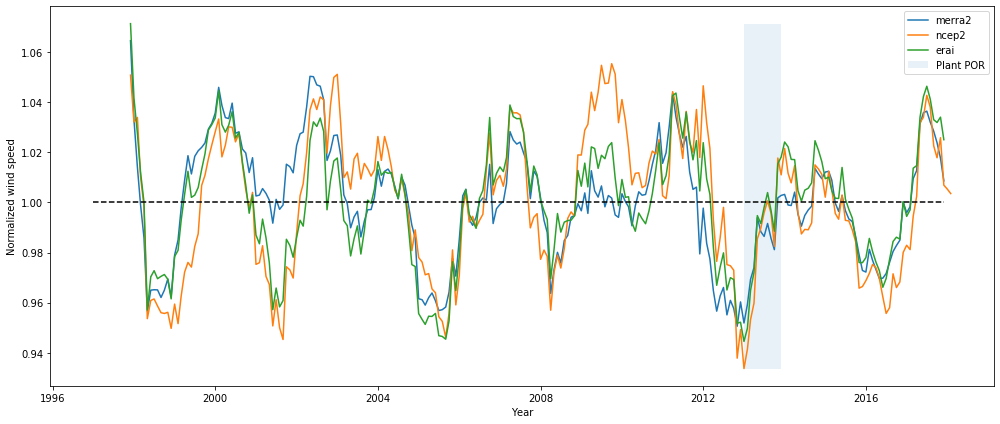

In [11]:
pa.plot_reanalysis_normalized_rolling_monthly_windspeed().show()

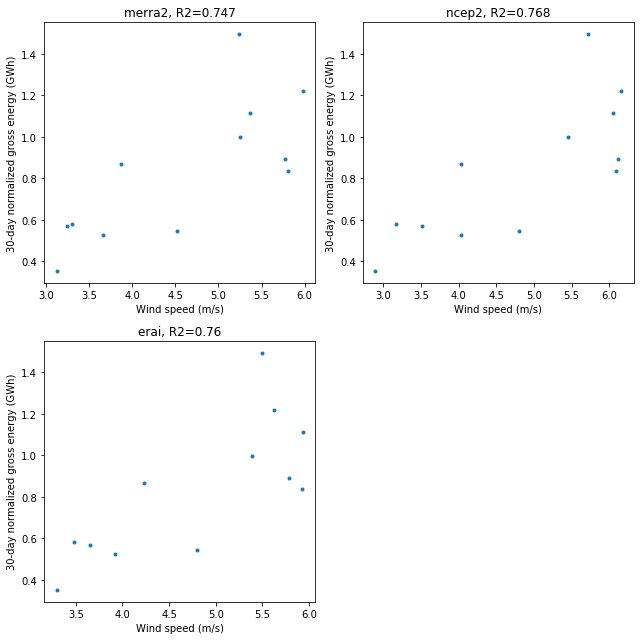

In [12]:
pa.plot_reanalysis_gross_energy_data(outlier_thres=3).show()

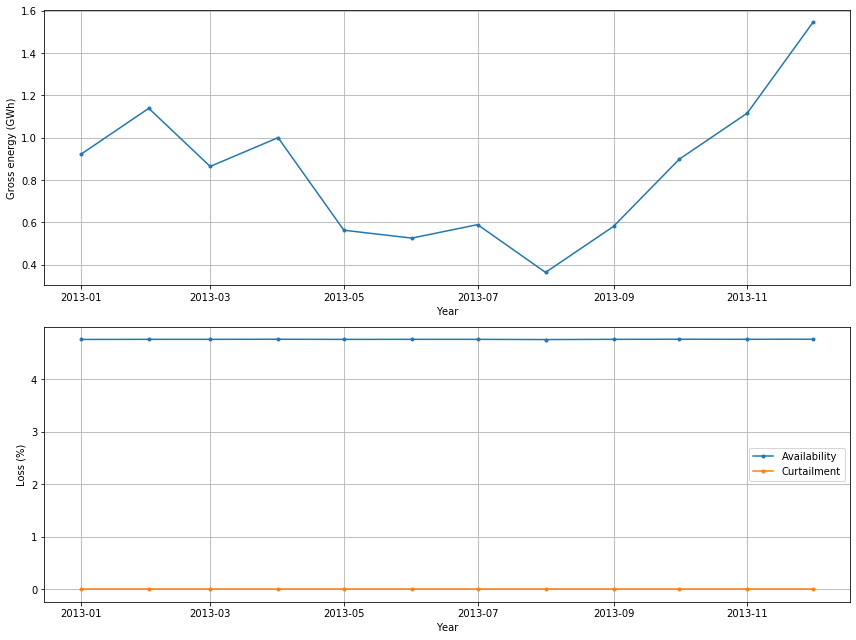

In [13]:
pa.plot_monthly_plant_data_timeseries().show()

In [14]:
# For illustrative purposes, let's suppose a few months aren't representative of long-term losses
pa._monthly.df.loc['2016-11-01',['availability_typical','curtailment_typical']] = False
pa._monthly.df.loc['2013-07-01',['availability_typical','curtailment_typical']] = False

/Users/nagarwal/Documents/SULI_2019/OpenOA/operational_analysis/methods/plant_analysis.py:213: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(sim_results['aep_GWh'], 40, normed=1)
/Users/nagarwal/Documents/SULI_2019/OpenOA/operational_analysis/methods/plant_analysis.py:222: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(sim_results['avail_pct'] * 100, 40, normed=1)
/Users/nagarwal/Documents/SULI_2019/OpenOA/operational_analysis/methods/plant_analysis.py:228: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(sim_results['curt_pct'] * 100, 40, normed=1)


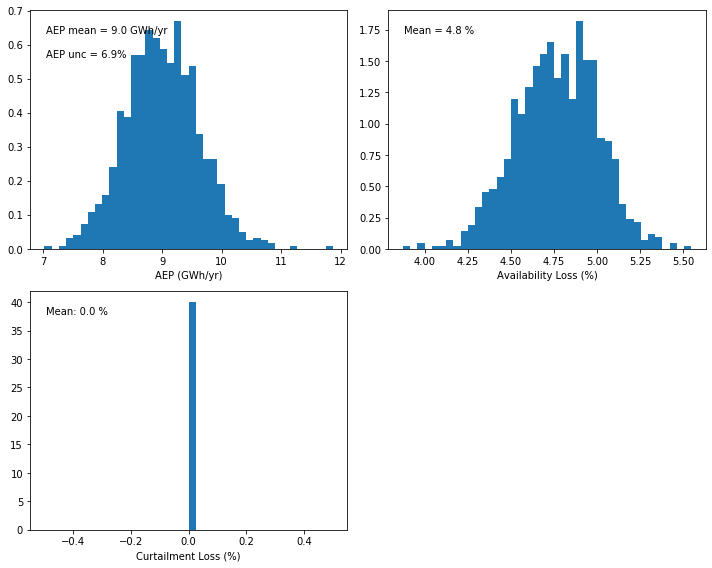

In [15]:
pa.plot_result_aep_distributions().show()

In [16]:
# Collect relevant Monte-Carlo parameters used in the simulations
mc_reg = pd.DataFrame(data = {'slope': pa._mc_slope,
                             'intercept': pa._mc_intercept, 
                              'num_points': pa._mc_num_points, 
                              'outlier_threshold': pa._mc_outlier_threshold, 
                              'metered_energy_fraction': pa._mc_metered_energy_fraction, 
                              'loss_fraction': pa._mc_loss_fraction, 
                              'num_years_windiness': pa._mc_num_years_windiness, 
                              'loss_threshold': pa._mc_loss_threshold, 
                              'reanalysis_product': pa._mc_reanalysis_product})

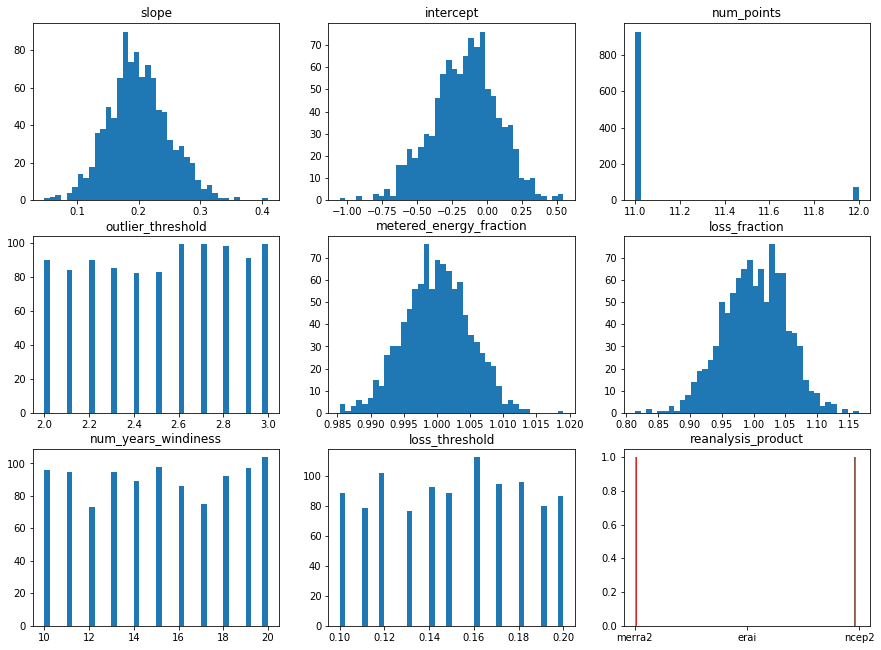

In [17]:
# Produce histograms of the various MC-parameters
plt.figure(figsize=(15,15))
for s in np.arange(mc_reg.shape[1]):
    plt.subplot(4,3,s+1)
    plt.hist(mc_reg.iloc[:,s],40)
    plt.title(mc_reg.columns[s])
plt.show()

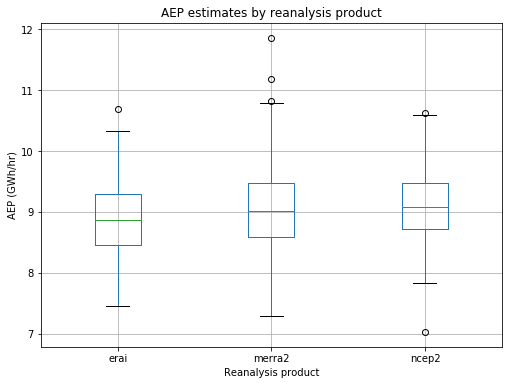

In [18]:
# Can illustrate APE dependency on Monte-Carlo variables through boxplots
sim_results = pa.results
# E.g. dependence on reanalysis product
tmp_df=pd.DataFrame(data={'aep':sim_results.aep_GWh,'reanalysis_product':mc_reg['reanalysis_product']})
tmp_df.boxplot(column='aep',by='reanalysis_product',figsize=(8,6))
plt.ylabel('AEP (GWh/hr)')
plt.xlabel('Reanalysis product')
plt.title('AEP estimates by reanalysis product')
plt.suptitle("")
plt.show()

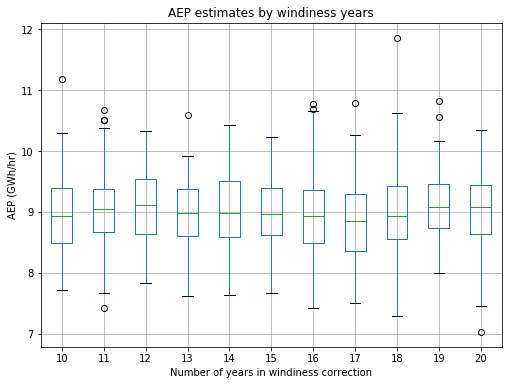

In [19]:
# E.g. dependence on # years in windiness correction

tmp_df=pd.DataFrame(data={'AEP':sim_results.aep_GWh,'num_years_windiness':mc_reg['num_years_windiness']})
tmp_df.boxplot(column='AEP',by='num_years_windiness',figsize=(8,6))
plt.ylabel('AEP (GWh/hr)')
plt.xlabel('Number of years in windiness correction')
plt.title('AEP estimates by windiness years')
plt.suptitle("")
plt.show()

In [20]:
# NCF
plant_capacity = 8.2 # MW
cap_factor = sim_results['aep_GWh'].mean()/plant_capacity/8766*1000*100
print('Net capacity factor of %s percent' % str(np.round(cap_factor,1)))

Net capacity factor of 12.5 percent
